In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

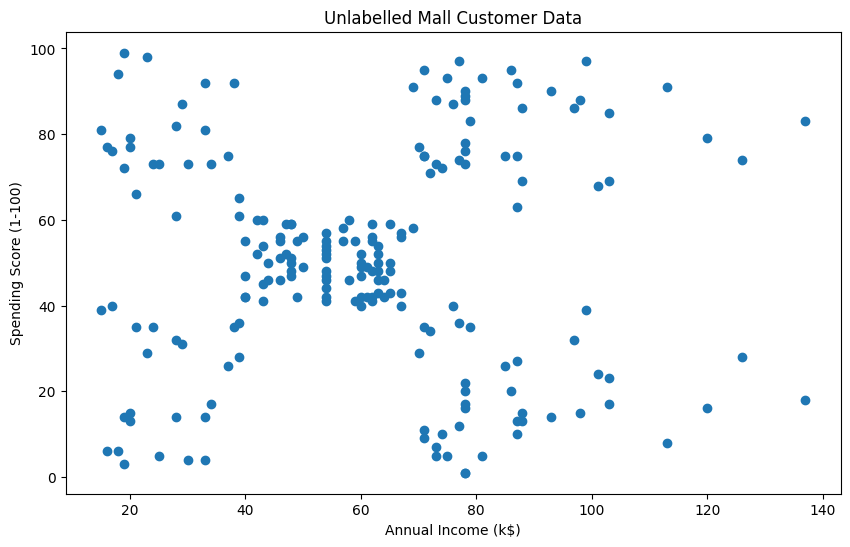

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Unlabelled Mall Customer Data')
plt.show

Since we are going to use Annual Income and Spending Score  columns only, lets create 2D array of these columns for further use

In [ ]:
X=df.iloc[:,[3,4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

Choosing The Number of Clusters
By visual inspection of above scatter plot, we can identify 5 possible clusters. But since there is no other information available its very difficult say it with 100% confidence. So lets try to verify this with Elbow method technique.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

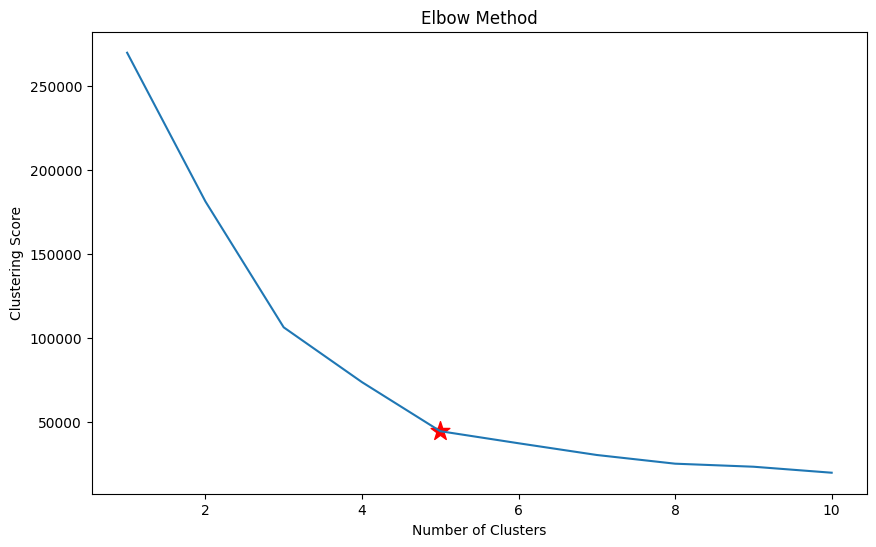

In [ ]:
clustering_score=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='random',random_state=42)
  kmeans.fit(X)
  clustering_score.append(kmeans.inertia_)# inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1,11),clustering_score)
plt.scatter(5,clustering_score[4],s=200,c='red',marker="*")
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.title('Elbow Method')
plt.show()

From above elbow plot its clear that clustering scores slows down after 5 number of clusters. So we can use K= 5 for further analysis.

Compute K-Means Clustering ¶
Compute cluster centers and predict cluster index for each sample. Since K=5 we will get the cluster index from 0 to 4 for every data point in our dataset.

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(X)
# Compute cluster centers and predict cluster index for each sample.
pred=kmeans.predict(X)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

'pred' contains the values index( 0 to 4) cluster for every training example. Let's add it to original dataset for better understanding.

In [ ]:
df['Cluster']=pd.DataFrame(pred,columns=['cluster'])
print('Number of data points in each cluster= \n',df['Cluster'].value_counts())

Number of data points in each cluster= 
 Cluster
0    81
4    39
1    35
2    23
3    22
Name: count, dtype: int64


Visualization
Let's plot the centroid and cluster with different colors to visualize, how K-Means algorithm has grouped the data.

Text(0.5, 1.0, 'Customer Cluster')

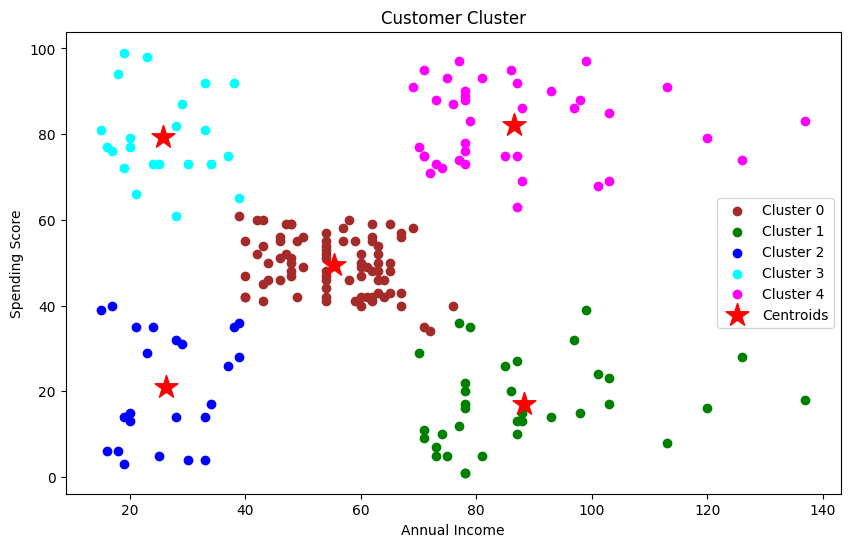

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred==0,0],X[pred==0,1],c='brown',label='Cluster 0')
plt.scatter(X[pred==1,0],X[pred==1,1],c='green',label='Cluster 1')
plt.scatter(X[pred==2,0],X[pred==2,1],c='blue',label='Cluster 2')
plt.scatter(X[pred==3,0],X[pred==3,1],c='cyan',label='Cluster 3')
plt.scatter(X[pred==4,0],X[pred==4,1],c='magenta',label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids',marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Cluster')


"""
    This function will plot the path taken by the centroids
     I/P:
    * centroid_history: 2D array of centroids. Each element represent the centroid coordinate.
      If there are 5 clusters then first set contains initial cluster cordinates
      (i.e. first 5 elements) and then k_means loop will keep appending new cluster coordinates for each iteration
    * n_clusters: Total number of clusters to find
    * centroid_sets: At the start we set random values as our first centroid set. K-Means loop will keep adding
    new centroid sets to centroid_history. Since we are ploting the path of centroid locations, centroid set value
    will be K-Means loop iteration number plus 1 for initial centroid set.
    So its value will be from 2 to K-Means loops max iter plus 1
    * cluster_color: Just to have same line and cluster color
    
    O/P: Plot the centroid path
    """

In [ ]:
def plot_k_means_progress(centroid_history,n_clusters,centroid_sets,cluster_color):
  c_x=[] # To store centroid X coordinated
  c_y=[]# To store the centroid Y coordinates
  for i in range(0,n_clusters):
    cluster_index=0
    for j in range(0,centroid_sets):
      c_x=np.append(c_x,centroid_histroy[:,0][i+cluster_index])
      c_y=np.append(c_y,centroid_history[:,1][i+cluster_index])
      cluster_index=cluster_index+n_clusters

      plt.plot(c_x, c_y, c= cluster_color['c_' + str(i)], linestyle='--')

      # Reset coordinate arrays to avoid continuous lines
      c_x= []
      c_y=[]

NameError: name 'centroid_histroy' is not defined

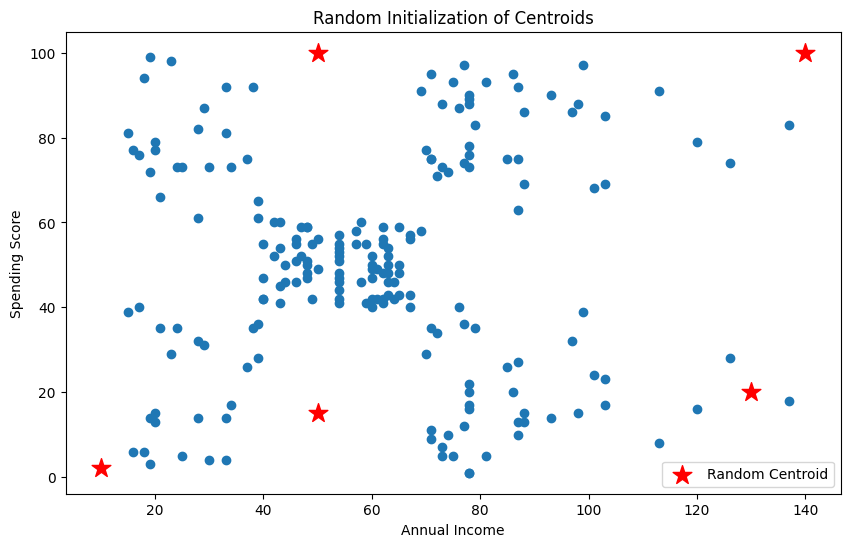

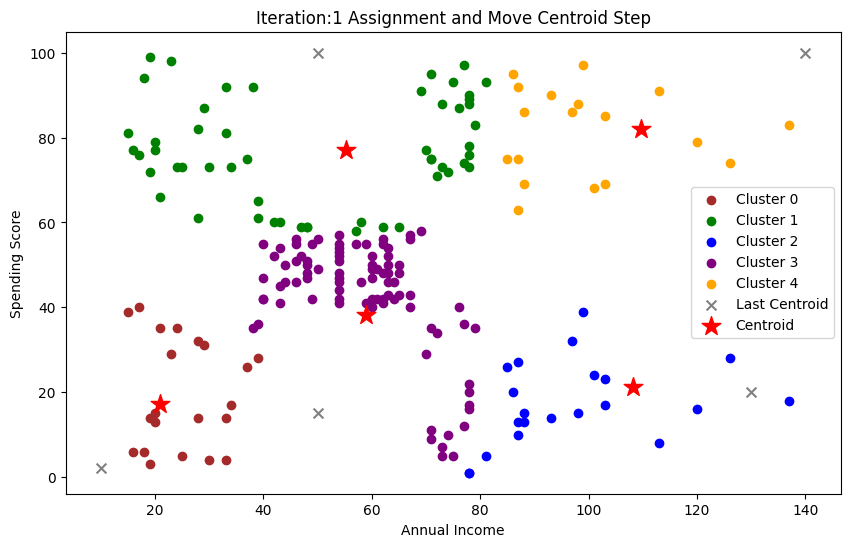

In [ ]:
plt.figure(figsize=(10,6))

# Random Initialization of Centroids
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
initial_centroid = np.array([[10, 2], [50,100], [130,20], [50,15], [140,100]])

plt.scatter(initial_centroid[:,0], initial_centroid[:, 1],s = 200, c = 'red', label = 'Random Centroid', marker='*')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Random Initialization of Centroids')

# K-Means loop of assignment and move centroid steps
centroid_history = []
centroid_history = initial_centroid
#
cluster_color= {'c_0':'brown','c_1':'green','c_2':'blue','c_3':'purple','c_4':'orange'}
n_clusters = 5
for i in range(1,6):
    kmeans= KMeans(n_clusters, init= initial_centroid, n_init= 1, max_iter= i, random_state = 42)  #n_init= 1 since our init parameter is array

    # Compute cluster centers and predict cluster index for each sample
    pred = kmeans.fit_predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

    plt.scatter(centroid_history[:,0], centroid_history[:, 1],s = 50, c = 'gray', label = 'Last Centroid', marker='x')

    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 200, c = 'red', label = 'Centroid', marker='*')

    centroid_history = np.append(centroid_history, kmeans.cluster_centers_, axis=0)

    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.title('Iteration:' + str(i) + ' Assignment and Move Centroid Step')

    centroid_sets = i + 1 # Adding one for initial set of centroids
    plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color)